In [3]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

In [4]:
def softmax(x):
    # stable softmax
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [5]:
# The A matrix represents generative model's "prior beliefs" about the relationship between hidden states and observations or how the hidden states generate observations
# columns are states, rows are observations/outputs

# (n_states, n_observations)
A = np.asarray([
    [7, 1, 1, 1],
    [1, 7, 1, 1],
    [1, 1, 7, 1],
    [1, 1, 1, 7],
]) / 10
# in the first state, there's a 70% chance of playing the first note, and a 10% chance of playing any other note (There's a 70% if the first note is played that the first state is the cause)
# in the second state, there's a 70% chance of playing the second note, and a 10% chance of playing any other note
# in the third state, there's a 70% chance of playing the third note, and a 10% chance of playing any other note
# in the fourth state, there's a 70% chance of playing the fourth note, and a 10% chance of playing any other note

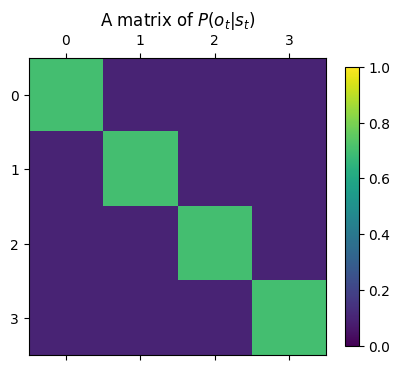

In [6]:
plt.matshow(A, vmin = 0.0, vmax = 1.0)
plt.title("A matrix of $P(o_t | s_t)$")
plt.colorbar(shrink=0.75)
plt.show()

In [7]:
# The B matrix represents the generative model's "prior beliefs" about the relationship between transitions between hidden states over time
# columns are states, rows are the next state
B = np.asarray([
    [1, 1, 1, 97],
    [97, 1, 1, 1],
    [1, 97, 1, 1],
    [1, 1, 97, 1],
]) / 100
# There's  a 97% chance of transitioning from the first state to the second state
# There's a 97% chance of transitioning from the second state to the third state
# There's a 97% chance of transitioning from the third state to the fourth state
# There's a 97% chance of transitioning from the fourth state to the first state

In [8]:
# Prior probabilities of the notes (always start with the first note)
D = np.asarray([
    1, 0, 0, 0
    # [1], 
    # [0],
    # [0], 
    # [0]
])
# Agent beliefs they are at position 0 with 100% certainty

$$ \begin{align} q(s_t) = \sigma\left(\ln \mathbf{A}[o,:] + \ln\mathbf{B}[:,:,u] \cdot q(s_{t-1})\right) \end{align} $$

$$
Q(s|\pi) = \prod_{\tau} Q(s_{\tau}|\pi)
$$

$$ \begin{align} P(s_t) = \mathbf{E}{q(s{t-1})}\left[P(s_t | s_{t-1}, u_{t-1})\right] \end{align} $$

In [9]:
eps_ = 1e-16

next_node_index = 0
# qs_past = [[1], [0], [0], [0]]
qs_past = [.97, 0.01, 0.01, 0.01] 
action_index = 0
print(B[:,action_index])
prior = B.dot(qs_past)
print("prior", prior)

log_likelihood = np.log(A[:, next_node_index] + eps_)
print(A[1])
print(log_likelihood)
log_prior = np.log(prior + eps_)
print(log_prior)
qs = softmax(log_likelihood + log_prior)

qs

[0.01 0.97 0.01 0.01]
prior [0.0196 0.9412 0.0196 0.0196]
[0.1 0.7 0.1 0.1]
[-0.35667494 -2.30258509 -2.30258509 -2.30258509]
[-3.93222571 -0.06059962 -3.93222571 -3.93222571]


array([0.12276306, 0.84216178, 0.01753758, 0.01753758])

In [10]:
B

array([[0.01, 0.01, 0.01, 0.97],
       [0.97, 0.01, 0.01, 0.01],
       [0.01, 0.97, 0.01, 0.01],
       [0.01, 0.01, 0.97, 0.01]])

In [11]:
B.dot([.97, 0.01, 0.01, 0.01])

array([0.0196, 0.9412, 0.0196, 0.0196])

In [12]:
D = [1, 0, 0, 0]

In [13]:
softmax(np.log([7, 1, 1, 1]))

array([0.7, 0.1, 0.1, 0.1])

expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
H_A [0.94044799 0.94044799 0.94044799 0.94044799]
[-0.35667494 -2.30258509 -2.30258509 -2.30258509]
belief of state [ -0.35667494 -39.14394658 -39.14394658 -39.14394658]
state_index 0
reg prior [0.01 0.97 0.01 0.01]
indexed prior [0.01]
[1.00000000e+00 1.42857143e-17 1.42857143e-17 1.42857143e-17]
expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
expected_free_energy -1.1102230246251565e-16
H_A [0.94044799 0.94044799 0.94044799 0.94044799]
[-2.30258509 -0.35667494 -2.30258509 -2.30258509]
belief of state [-6.90775528 -0.38713415 -6.90775528 -6.90775528]
state_index 1
reg prior [0.01140762 0.01140762 0.96577713 0.01140762]
indexed prior [0.01140762]
[0.00146628 0.99560117 0.00146628 0.00146628]
expected_free_energy 0.0
expecte

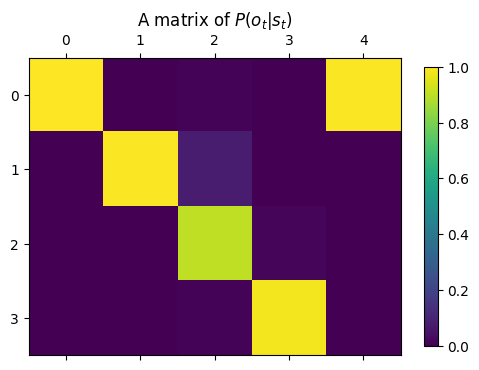

In [20]:
outs = [0, 1, 1, 3, 0] # the third note should have been 2, but the agent mistakenly played 1

D = np.asarray([1, 0, 0, 0])

qs = D
prior = D #B[:,-1].dot(qs)

qs_list = []
qo_list = []
prior_list = []
free_e_list = []

def calculate_G(A, B, qs_current):

    G = np.zeros(len(D))

    h_a = - (A * np.log(A + eps_)).sum(axis=0)

    for action_index in range(len(D)):

        qs_u = B.dot(qs_current) #B[action_index,:]
        predicted_uncertainty = h_a.dot(qs_u)
        kl_divergence = np.log(A[:, action_index] + eps_).dot(A[:, action_index])
        expected_free_energy = kl_divergence + predicted_uncertainty
        G[action_index] = expected_free_energy

        print("expected_free_energy", expected_free_energy)
    



for state_index, out in enumerate(outs):
    qo_list.append(A.dot(qs))

    calculate_G(A, B, qs)

    # qs_u = B.dot(qs)

    # h_a = - (A * np.log(A + eps_)).sum(axis=0)
    # qo_u = A.dot(qs_u)
    # predicted_uncertainty = h_a.dot(qs_u)

    # kl_divergence = np.log(qo_u + eps_).dot(qo_u)

    # expected_free_energy = kl_divergence + predicted_uncertainty

    # free_e_list.append(expected_free_energy)

    # print("expected_free_energy", expected_free_energy)
    # for i in range(4):
    #     n_q = np.zeros(4)
    #     n_q[i] = 1
    #     qs_u = B[i,:].dot(qs)
    #     predicted_uncertainty = H_A.dot(qs_u)
    #     print("predicted_uncertainty", predicted_uncertainty)

    print("H_A", h_a)

    next_node_index = out
    log_likelihood = np.log(A[:, next_node_index] + eps_)
    log_prior = np.log(prior + eps_)
    print(log_likelihood)
    print("belief of state", log_likelihood + log_prior)
    qs = softmax(log_likelihood + log_prior)
    
    
    print("state_index", state_index % 4)
    
    prior = B.dot(qs)
    print("reg prior", B.dot(qs))
    print("indexed prior", B[state_index % 4, :].reshape(1, 4).dot(qs))


    prior_list.append(prior)
    qs_list.append(qs)
    print(qs)


plt.matshow(np.asarray(qs_list).T, vmin = 0.0, vmax = 1.0)
plt.title("A matrix of $P(o_t | s_t)$")
plt.colorbar(shrink=0.75)
plt.show()

[array([0.7, 0.1, 0.1, 0.1]), array([0.7, 0.1, 0.1, 0.1]), array([0.10087977, 0.6973607 , 0.10087977, 0.10087977]), array([0.1064061 , 0.14484273, 0.64234506, 0.1064061 ]), array([0.10193886, 0.10193886, 0.10782716, 0.68829513])]


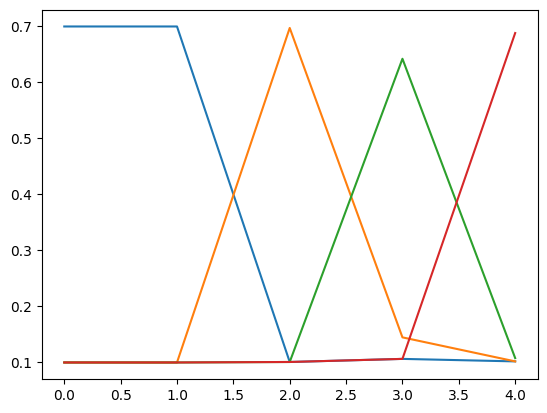

In [13]:
print(qo_list)
plt.plot(np.asarray(qo_list))

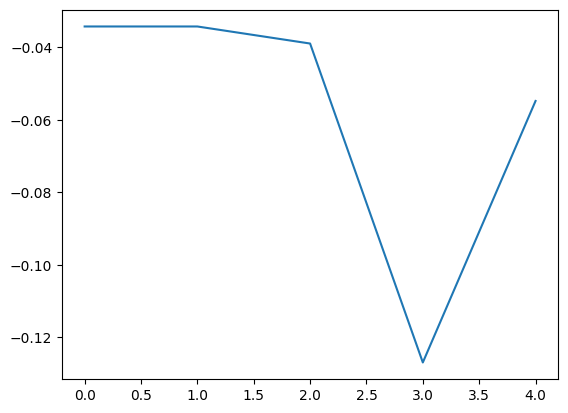

In [46]:
plt.plot(np.asarray(free_e_list))

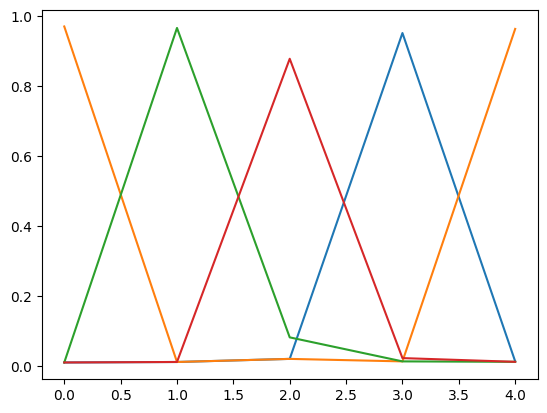

In [14]:


plt.plot(np.asarray(prior_list))

In [15]:
B[:,1]

array([0.01, 0.01, 0.97, 0.01])

In [16]:
import itertools

grid_locations = list(itertools.product(range(3), repeat = 2))
print("grid_locations", grid_locations)

n_states = len(grid_locations)
n_observations = len(grid_locations)

A = np.zeros( (n_states, n_observations) )
np.fill_diagonal(A, 1.0)
print("A", A)

actions = ["UP", "DOWN", "LEFT", "RIGHT", "STAY"]

def create_B_matrix():
  B = np.zeros( (len(grid_locations), len(grid_locations), len(actions)) )

  for action_id, action_label in enumerate(actions):

    for curr_state, grid_location in enumerate(grid_locations):

      y, x = grid_location

      if action_label == "UP":
        next_y = y - 1 if y > 0 else y 
        next_x = x
      elif action_label == "DOWN":
        next_y = y + 1 if y < 2 else y 
        next_x = x
      elif action_label == "LEFT":
        next_x = x - 1 if x > 0 else x 
        next_y = y
      elif action_label == "RIGHT":
        next_x = x + 1 if x < 2 else x 
        next_y = y
      elif action_label == "STAY":
        next_x = x
        next_y = y
      new_location = (next_y, next_x)
      next_state = grid_locations.index(new_location)
      B[next_state, curr_state, action_id] = 1.0
  return B

B = create_B_matrix()
print("B", B)

""" Create an infer states function that implements the math we just discussed"""

def softmax(dist):
    """ 
    Computes the softmax function on a set of values
    """

    output = dist - dist.max(axis=0)
    output = np.exp(output)
    output = output / np.sum(output, axis=0)
    return output

def infer_states(observation_index, A, prior):
  eps_ = 1e-16
  """ Implement inference here -- NOTE: prior is already passed in, so you don't need to do anything with the B matrix. """
  """ This function has already been given P(s_t). The conditional expectation that creates "today's prior", using "yesterday's posterior", will happen *before calling* this function"""
  
  log_likelihood = np.log(A[observation_index,:] + eps_)

  log_prior = np.log(prior + eps_)

  qs = softmax(log_likelihood + log_prior)
   
  return qs

grid_locations [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
A [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
B [[[1. 0. 1. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 1. 1.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1

In [17]:
# qs_past = utils.onehot(4, n_states) # agent believes they were at location 4 -- i.e. (1,1) one timestep ago
qs_past = np.zeros(n_states)
qs_past[4] = 1

last_action = "UP" # the agent knew it moved "UP" one timestep ago
action_id = actions.index(last_action) # get the action index for moving "UP"
print("action_id", action_id, qs_past)

action_id 0 [0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
B[:,:,action_id]

array([[1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
prior = B[:,:,action_id].dot(qs_past)

observation_index = 2

print("prior", prior)
qs_new = infer_states(observation_index, A, prior)
print("qs_new", qs_new)


prior [0. 1. 0. 0. 0. 0. 0. 0. 0.]
qs_new [5.e-17 5.e-01 5.e-01 5.e-17 5.e-17 5.e-17 5.e-17 5.e-17 5.e-17]


In [20]:
time_steps = 100
notes_count = 0
notes_played = []
next_node_index = choice(range(4), p=D)
prior = D
while notes_count < time_steps:
    # print(next_node_index)
    played_note = choice(range(4), p=A[:,next_node_index])
    notes_played.append(played_note)
    # print(played_note)
    next_node_index = choice(range(4), p=B[:,next_node_index])

    log_likelihood = np.log(A[played_note, next_node_index])

    log_prior = np.log(prior)

    qs

    prior = B[:, next_node_index] #* prior #FIXME: use dot instead?

    # qs = softmax(log_likelihood + log_prior)
    # prior = 
    # D = D @ A @ B
    # print(D)
    notes_count += 1


# plt.plot(notes_played)

ValueError: 'a' and 'p' must have same size

In [ ]:
qs

array([0.97, 0.01, 0.01, 0.01])

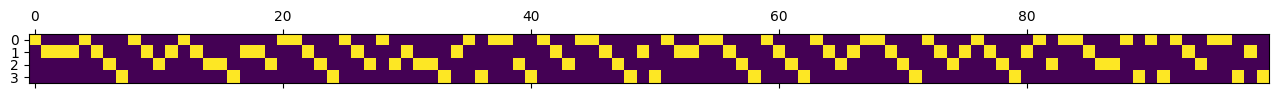

In [ ]:
matrix = np.zeros((A.shape[0], len(notes_played)))
# notes_played_indices = [(note, i) for i, note in enumerate(notes_played)]

for i, note in enumerate(notes_played):
    matrix[note, i] = 1

plt.matshow(matrix)
plt.show()


In [ ]:
# Posterior beliefs about each note in the sequence at each time step